In [1]:
#(source: Simplilearn youtube course) 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
data=pd.read_csv('1000_Companies.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
X=data.iloc[:, :-1]
Y=data.iloc[:,-1]

In [4]:
#enconding the state column to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
#print(X[:,3])

transformer = make_column_transformer(
    (OneHotEncoder(), ['State']),
    remainder='passthrough')
X_trans     = transformer.fit_transform(X)
X_trans     = pd.DataFrame(X_trans,columns=transformer.get_feature_names_out())

,onehotencoder__State_California,onehotencoder__State_Florida,onehotencoder__State_New York,remainder__R&D Spend,remainder__Administration,remainder__Marketing Spend
0,0.0,0.0,1.0,165349.20,136897.800,471784.1000
1,1.0,0.0,0.0,162597.70,151377.590,443898.5300
2,0.0,1.0,0.0,153441.51,101145.550,407934.5400
3,0.0,0.0,1.0,144372.41,118671.850,383199.6200
4,0.0,1.0,0.0,142107.34,91391.770,366168.4200
...,...,...,...,...,...,...
995,1.0,0.0,0.0,54135.00,118451.999,173232.6695
996,1.0,0.0,0.0,134970.00,130390.080,329204.0228
997,1.0,0.0,0.0,100275.47,241926.310,227142.8200
998,1.0,0.0,0.0,128456.23,321652.140,281692.3200


<AxesSubplot:>

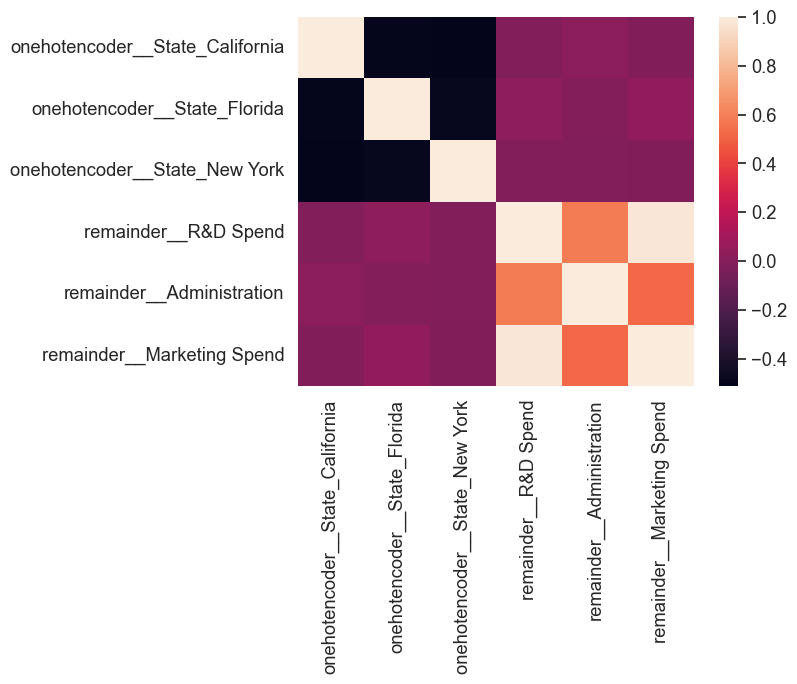

In [15]:
sns.heatmap(X_trans.corr())

In [13]:
#fit model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test = train_test_split(X_trans,Y,test_size=0.2,random_state=0)
model = LinearRegression()
fit   = model.fit(x_train,y_train)

In [14]:
#scoring
from sklearn.metrics import r2_score
y_pred = model.predict(x_test)
score= r2_score(y_test,y_pred)
print(score)

0.9112695892268727


In [16]:
#additional details of the regression
angular_coefs  = model.coef_
intercept_coef = model.intercept_

array([ 5.26235224e+02, -3.54301375e+02, -1.71933849e+02,  5.25845857e-01,
        8.44390881e-01,  1.07574255e-01])